# Pythonで数式お勉強

In [109]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
iris_data = load_iris()

例
$$
\begin{align}
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}
\end{align}
$$


## ベクトル

やっと理解への光が見えた

* ベクトルの入門
    * http://www.geocities.co.jp/Technopolis/1505/vx_index.htm
* ベクトルの内積について
    * http://www.geisya.or.jp/~mwm48961/kou2/matrix2.html
    * 行と列の積
        * 左からは行ベクトルを右からは列ベクトルを掛けるものとします。
    * 行列（２次元以上？）の積
        * ［ｍ x ｎ型］［ｎ x ｐ型］＝［ｍ x ｐ型］ 
        * 積が定義されるためには，左の列数と右の行数が等しくなければなりません
        * 左の列（左n）の数と右の行（右n）の数の行数が同じじゃないとダメ
        * 結果は[m x p型]となる

$$|\vec{a}|$$

よく見る↑のパイプ文字は絶対値の意味

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [7]:
# 行と列の内積
np.dot(a, b)

32

In [15]:
# 行の数と列の数が合わない場合はNG
# _a = np.array([1, 2])
_b = np.array([4, 5, 6])
# print(np.dot(_a, _b))
# ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

_a = np.array([1, 2, 4]) # 列と同じする
# 1行 x 3列の内積
print(np.dot(_a, _b))

38


In [17]:
__a = np.array([1, 2, 3])
__b = np.array([4, 5, 6])
# 1行, 3列 x 3行 x 1列の内積
print(np.dot(__a, __b.T))

32


In [19]:
# NG
# __a = np.array([1, 2, 3])
# __b = np.array([4, 5])
# 1行, 3列 x 2行 x 1列の内積
# print(np.dot(__a, __b.T))
# ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

## 線形代数

参考にしたURL↓

http://s0sem0y.hatenablog.com/entry/2016/05/16/235135

$$
\vec{x}^{\mathrm{T}} \cdot \vec{y} = (x_1, x_2, x_3)  \left(
    \begin{array}{c}
      y_1 \\
      y_2 \\
      y_3
    \end{array}
  \right) = (x_1y_1, x_2y_2, x_3y_3)
$$


In [6]:
x = np.array([1, 2, 3])
y = np.array([10, 9, 8], ndmin=2).T
# 1* 10 + 2 * 9 + 3 * 8 = 10 + 18 + 24 = 28 + 24 = 52?
x.dot(y)

array([52])

$$
\vec{x} \cdot \vec{y}^{\mathrm{T}} = \left(
    \begin{array}{c}
      x_1 \\
      x_2 \\
      x_3
    \end{array}
  \right) (y_1, y_2, y_3) = \left(
      \begin{array}{c}
      {x_1}y_1 & {x_1}y_2 & {x_1}y_3\\
      {x_2}y_1 & {x_2}y_2 & {x_2}y_3\\
      {x_3}y_1 & {x_3}y_2 & {x_3}y_3\\
      \end{array}
  \right)
$$


In [11]:
x = np.array([1, 2, 3])
y = np.array([10, 9, 8])
xx = np.array(x, ndmin=2).T

xx * y

array([[10,  9,  8],
       [20, 18, 16],
       [30, 27, 24]])

## 対数

対数って何よ！
http://manapedia.jp/text/684

$$2^x = 16$$

16は2の4乗なので、x = 4と簡単に求められる。

が、

$$3^x = 5$$

は、無理数（有理数ではない実数、つまり分子・分母ともに整数である分数（比 = 英: ratio）として表すことのできない実数を指す。）なので、すぐに求めるのが大変。

ここで使うのがログ（log）とのこと
３をｘ乗して５となるときｘの値を 

$$ x = \log_35 $$

と表します。無理数じゃなくても使える。

$$ 4 = \log_216$$

求め方はわからん

In [23]:
# と、思いきやnp.log(x)とある！
np.log(16)

2.7725887222397811

・・・・？


使い方わからんかったので、ググったら見つかった

http://pythondatascience.plavox.info/numpy/%E6%95%B0%E5%AD%A6%E7%B3%BB%E3%81%AE%E9%96%A2%E6%95%B0/

In [26]:
# マジックメソッド・・・？？？
np.log2(3)

1.5849625007211561

In [31]:
# さっきの問題を解くと
np.log2(16)

4.0

おおー！

In [32]:
np.log3(5)

AttributeError: module 'numpy' has no attribute 'log3'

あれ？？？

なんか用意されていないっぽい

>NumPy には、対数関数として以下が定義されています。
>
>e が底 (Log_e(x)) の np.log(x)  
>2 が底（Log_2(x)）の np.log2(x)  
>10 が底（Log_10(x)）の np.log10(x)

うーむ。よくわからんが求められないのかね？

さらに、$$\log5$$
のように底がない場合があるとのこと

底がない場合は
* 底eの省略なら数3の微分積分
* 底10の省略なら常用対数

とのこと
eは自然数のこと。まぁない場合は明記があるとかないとか

In [35]:
# こういうことでいいのかな？
np.log10(5)

0.69897000433601886

## 書籍「統計学の基礎のキ」から

* chapter2
    * 平均値
        * $$\displaystyle \overline{x} = \frac{\sum^N_{i=1}x_i}{N} = \frac{x_1 + x_2 + \cdots + x_i + \cdots + x_N}{N}$$
    * 中央値
    * 最頻値
    * 他にもある
        * トリム平均

In [28]:
# pythonでやるとこんな感じ
a = np.array([1, 2, 3, 4 , 5, 6, 6, 6])

# 平均値
# np.sum(a) / len(a) <-これでもいけるが、numpyには関数が用意されている
print('平均値: %.2f' % a.mean())
print('これも？: %.2f' % np.average(a))

# 中央値
print('中央値: %.2f' % np.median(a))

# 最頻値の求め方がわからん
print('最頻値')

平均値: 4.12
これも？: 4.12
中央値: 4.50
最頻値


In [101]:
# データの確認
iris_data_list = iris_data.data
print('カラムの名前:', iris_data.feature_names)
print('行,列:', iris_data_list.shape)

カラムの名前: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
行,列: (150, 4)


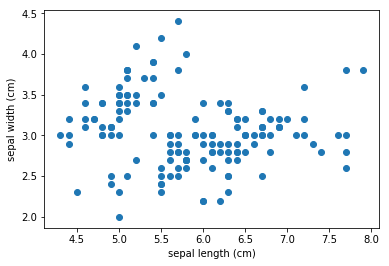

In [64]:
# plotしておく
plt.scatter(x=iris_data_list[:, 0], y=iris_data_list[:, 1])
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

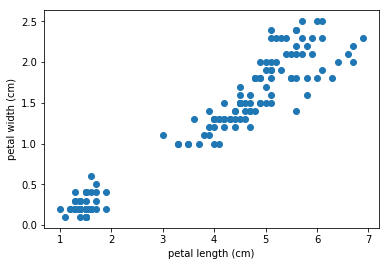

In [63]:
plt.scatter(x=iris_data_list[:, 2], y=iris_data_list[:, 3])
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

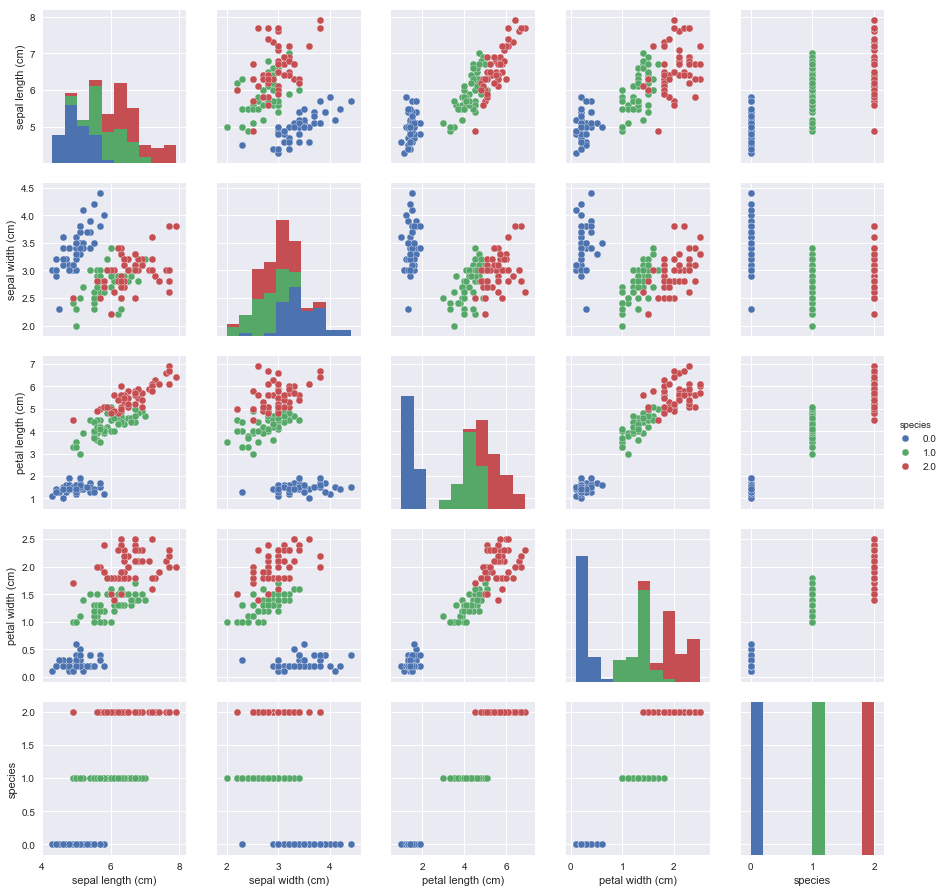

In [119]:
_names = iris_data.feature_names.copy()
_names.append('species')
iris_df = pd.DataFrame(np.c_[iris_data_list,  iris_data.target], columns=_names)
sns.pairplot(iris_df, hue='species')

* chapter3
    * 分散について
        * 絶対値の和によるデータのバラツキ -> 平均偏差
        * 2乗の和であるデータのバラツキ -> 1個あたりのデータの変動
        * １個あたりのデータの変動（分散）
            * $$\frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \cdots + (x_i - \overline{x})^2}{N}$$
        * 標本分散（これをよく使う）
            * $$s^2 = \frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \cdots + (x_i - \overline{x})^2}{N - 1} = \frac{N\cdot(\sum^N_{i=1}x_i^2) - (\sum^N_{i=1}x_i)^2}{N \cdot(N -1)}$$
    * データ変動の式
         * $$\sum^N_{i=1}(x_i - \overline{x})^2$$
         * $$\frac{N\cdot(\sum^N_{i=1}x_i^2) - (\sum^N_{i=1}x_i)^2}{N}$$
    *  母集団
        * 母集団の平均・・・母平均 $μ$ （ミュー）
        * 母集団の分散・・・母分散 $σ^2$ （シグマ）
    * 分散の公式
        * $$Var(ax + b) = Var(ax) = a^2 \cdot Var(x)$$
            * xの分散 $$S^2 = Var(x)$$
            * xの標準分散 $$s^2 = Var(x)$$

In [143]:
def _my_var(list, ddof=0):
    N = len(list)
    overline_x = 0
    for i in list:
        overline_x += i
    overline_x /= N 
    _sum = 0
    for i in list:
        _sum += (i - overline_x)**2
    return _sum / (N - ddof)


# 分散を調べる
print('分散:', '-'*30)
print('sepal length:', np.var(iris_data_list[:, 0]))
print('sepla width:', np.var(iris_data_list[:, 1]))
print('petal lidth:', np.var(iris_data_list[:, 2]))
print('petal width:', np.var(iris_data_list[:, 3]))

# 自分で作った関数で分散を調べる
print('自作 分散:', '-'*30)
print('sepal length:', _my_var(iris_data_list[:, 0]))
print('sepla width:', _my_var(iris_data_list[:, 1]))
print('petal lidth:', _my_var(iris_data_list[:, 2]))
print('petal width:', _my_var(iris_data_list[:, 3]))

# 不偏分散
print('不偏分散:', '-'*30)
print('sepal length:', np.var(iris_data_list[:, 0], ddof=1))
print('sepla width:', np.var(iris_data_list[:, 1], ddof=1))
print('petal lidth:', np.var(iris_data_list[:, 2], ddof=1))
print('petal width:', np.var(iris_data_list[:, 3], ddof=1))

# 自作不偏分散
print('自作不偏分散:', '-'*30)
print('sepal length:', _my_var(iris_data_list[:, 0], ddof=1))
print('sepla width:', _my_var(iris_data_list[:, 1], ddof=1))
print('petal lidth:', _my_var(iris_data_list[:, 2], ddof=1))
print('petal width:', _my_var(iris_data_list[:, 3], ddof=1))

分散: ------------------------------
sepal length: 0.681122222222
sepla width: 0.186750666667
petal lidth: 3.09242488889
petal width: 0.578531555556
自作 分散: ------------------------------
sepal length: 0.681122222222
sepla width: 0.186750666667
petal lidth: 3.09242488889
petal width: 0.578531555556
不偏分散: ------------------------------
sepal length: 0.685693512304
sepla width: 0.188004026846
petal lidth: 3.11317941834
petal width: 0.582414317673
自作不偏分散: ------------------------------
sepal length: 0.685693512304
sepla width: 0.188004026846
petal lidth: 3.11317941834
petal width: 0.582414317673


* chapter4
    * 標準偏差
        * 分散の単位が2乗されているため、平方根で単位を戻す
            * 分散S^2を標準偏差S
                * $$S= \sqrt{\frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \cdots + (x_i - \overline{x})^2}{N}}$$
            * 標本分散s^2を標本標準偏差s
                * $$s= \sqrt{\frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \cdots + (x_i - \overline{x})^2}{N - 1}}$$
    * なんで標準化すんの？
        * 標準化したデータの1.平均をとると0になる。2.標準偏差を求めると1になる
        * 温度と圧力を説明変数としたときに、大きい値に引っ張られるので標準化する
            * データの標準化
                * $$x => \frac{x - 平均}{標準偏差}$$

In [135]:
# 標準偏差(推測統計)
print('標準偏差(推測統計):', '-'*30)
print('sepal length:', np.std(iris_data_list[:, 0]))
print('sepla width:', np.std(iris_data_list[:, 1]))
print('petal lidth:', np.std(iris_data_list[:, 2]))
print('petal width:', np.std(iris_data_list[:, 3]))

# 標準偏差(記述統計)
print('標準偏差(記述統計):', '-'*30)
print('sepal length:', np.std(iris_data_list[:, 0], ddof=1))
print('sepla width:', np.std(iris_data_list[:, 1], ddof=1))
print('petal lidth:', np.std(iris_data_list[:, 2], ddof=1))
print('petal width:', np.std(iris_data_list[:, 3], ddof=1))

標準偏差(推測統計): ------------------------------
sepal length: 0.825301291785
sepla width: 0.432146580071
petal lidth: 1.75852918341
petal width: 0.760612618588
標準偏差(記述統計): ------------------------------
sepal length: 0.828066127978
sepla width: 0.433594311362
petal lidth: 1.76442041995
petal width: 0.763160741701


* chapter5はplotの話なので飛ばす
* chapter6
    * 相関係数
        * $$r = \frac{\sum^N_{i=1}(a_i - \overline{a})(b_i - \overline{b})}{\sqrt{\sum^N_{i=1}(a_i - \overline{a})^2} \cdot \sqrt{\sum^N_{i=1}(b_i - \overline{b})^2}}$$
        * 上の式をピアソンの相関係数といいます。
        * rのことを積率相関係数
    * $$a_1b_1 + a_2b_2$$
        * 内積
    * 共分散
        * $$ \frac{(a_1 - \overline{a})(b_1 - \overline{b}) + (a_2 - \overline{a})(b_2 - \overline{b}) + \cdots + (a_N - \overline{a})(b_N - \overline{b})}{N - 1} + \frac{\sum^N_{i=1}(a_i - \overline{a})(b_i - \overline{b})}{N - 1}$$

* chapter7
    * スピアマンの順位相関係数
        * $$r_s = 1 - \frac{6\sum^N_{i=1}(a_i - b_i)^2}{N(N^2 - 1)}$$

In [134]:
# 相関係数 numpyはピアソンを利用しているとか
print('相関係数:', '-'*30)
print('sepal length + width:', np.corrcoef(iris_data_list[:, 0], iris_data_list[:, 1])[0][1])
print('sepal length + petal width:', np.corrcoef(iris_data_list[:, 0], iris_data_list[:, 3])[0][1])
print('sepal length + petal length:', np.corrcoef(iris_data_list[:, 0], iris_data_list[:, 2])[0][1])
print('setal width + petal width:', np.corrcoef(iris_data_list[:, 1], iris_data_list[:, 2])[0][1])
print('setal width + petal length:', np.corrcoef(iris_data_list[:, 1], iris_data_list[:, 3])[0][1])
print('petal length + petal width:', np.corrcoef(iris_data_list[:, 2], iris_data_list[:, 3])[0][1])

相関係数: ------------------------------
sepal length + width: -0.109369249951
sepal length + petal width: 0.817953633369
sepal length + petal length: 0.871754157305
setal width + petal width: -0.420516096401
setal width + petal length: -0.356544089614
petal length + petal width: 0.962757097051


In [130]:
# pandasでやると楽
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


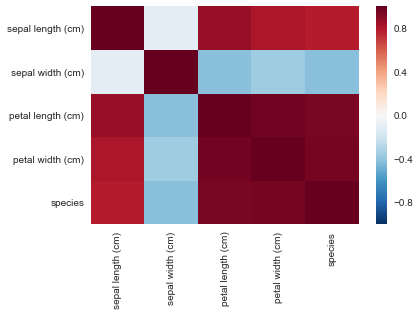

In [132]:
# 更にplot化すると良い
sns.heatmap(iris_df.corr())